In [55]:
from pyspark.sql import SparkSession
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql.functions import when
%matplotlib inline

In [3]:
spark = SparkSession \
    .builder \
    .appName("Python Spark SQL basic example") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

In [4]:
df = spark.read.csv('iris.csv', header=True)
df.show(5)

+------------+-----------+------------+-----------+-------+
|sepal_length|sepal_width|petal_length|petal_width|species|
+------------+-----------+------------+-----------+-------+
|         5.1|        3.5|         1.4|        0.2| setosa|
|         4.9|        3.0|         1.4|        0.2| setosa|
|         4.7|        3.2|         1.3|        0.2| setosa|
|         4.6|        3.1|         1.5|        0.2| setosa|
|         5.0|        3.6|         1.4|        0.2| setosa|
+------------+-----------+------------+-----------+-------+
only showing top 5 rows



In [6]:
df.groupby()

In [7]:
df.agg({'sepal_length': 'max', 'sepal_width' : 'max', 'petal_length' : 'max', 'petal_width' : 'max'}).show()

+----------------+----------------+-----------------+-----------------+
|max(sepal_width)|max(petal_width)|max(sepal_length)|max(petal_length)|
+----------------+----------------+-----------------+-----------------+
|             4.4|             2.5|              7.9|              6.9|
+----------------+----------------+-----------------+-----------------+



In [8]:
df.agg({'sepal_length': 'min', 'sepal_width' : 'min', 'petal_length' : 'min', 'petal_width' : 'min'}).show()

+----------------+----------------+-----------------+-----------------+
|min(sepal_width)|min(petal_width)|min(sepal_length)|min(petal_length)|
+----------------+----------------+-----------------+-----------------+
|             2.0|             0.1|              4.3|              1.0|
+----------------+----------------+-----------------+-----------------+



In [9]:
df.agg({'sepal_length': 'avg', 'sepal_width' : 'avg', 'petal_length' : 'avg', 'petal_width' : 'avg'}).show()

+------------------+------------------+-----------------+------------------+
|  avg(sepal_width)|  avg(petal_width)|avg(sepal_length)| avg(petal_length)|
+------------------+------------------+-----------------+------------------+
|3.0540000000000007|1.1986666666666672|5.843333333333335|3.7586666666666693|
+------------------+------------------+-----------------+------------------+



In [49]:
pd_df = df.toPandas()

Text(0, 0.5, 'petal_width')

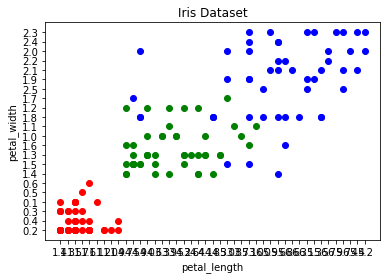

In [45]:
colors = {'setosa':'r', 'versicolor':'g', 'virginica':'b'}

fig, ax = plt.subplots()

for i in range(len(pd_df['petal_length'])):
    ax.scatter(pd_df['petal_length'][i], pd_df['petal_width'][i], color=colors[pd_df['species'][i]])
    
ax.set_title('Iris Dataset')
ax.set_xlabel('petal_length')
ax.set_ylabel('petal_width')

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

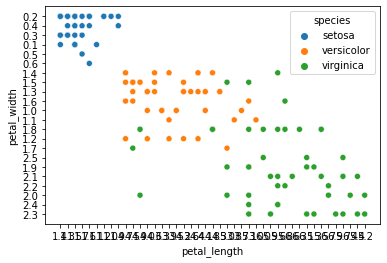

In [82]:
sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=pd_df)

In [72]:
df2 = df.withColumn("Suggest", when(df.petal_length < 1.7, "Setosa")
                               .when(df.petal_width < 1, "Setosa")
                               .otherwise("Unknown"))
df2.show(150)

+------------+-----------+------------+-----------+----------+-------+
|sepal_length|sepal_width|petal_length|petal_width|   species|Suggest|
+------------+-----------+------------+-----------+----------+-------+
|         5.1|        3.5|         1.4|        0.2|    setosa| Setosa|
|         4.9|        3.0|         1.4|        0.2|    setosa| Setosa|
|         4.7|        3.2|         1.3|        0.2|    setosa| Setosa|
|         4.6|        3.1|         1.5|        0.2|    setosa| Setosa|
|         5.0|        3.6|         1.4|        0.2|    setosa| Setosa|
|         5.4|        3.9|         1.7|        0.4|    setosa| Setosa|
|         4.6|        3.4|         1.4|        0.3|    setosa| Setosa|
|         5.0|        3.4|         1.5|        0.2|    setosa| Setosa|
|         4.4|        2.9|         1.4|        0.2|    setosa| Setosa|
|         4.9|        3.1|         1.5|        0.1|    setosa| Setosa|
|         5.4|        3.7|         1.5|        0.2|    setosa| Setosa|
|     

In [74]:
pd_df2 = df2.toPandas()
pd_df2

,sepal_length,sepal_width,petal_length,petal_width,species,Suggest
0,5.1,3.5,1.4,0.2,setosa,Setosa
1,4.9,3.0,1.4,0.2,setosa,Setosa
2,4.7,3.2,1.3,0.2,setosa,Setosa
3,4.6,3.1,1.5,0.2,setosa,Setosa
4,5.0,3.6,1.4,0.2,setosa,Setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,Unknown
146,6.3,2.5,5.0,1.9,virginica,Unknown
147,6.5,3.0,5.2,2.0,virginica,Unknown
148,6.2,3.4,5.4,2.3,virginica,Unknown


In [79]:
correct = 0
for i in range(len(pd_df2['Suggest'])):
    if (pd_df2['Suggest'][i] == 'Setosa' and pd_df2['species'][i] == 'setosa'): correct = correct + 1
correct

50

In [81]:
incorrect = 0
for i in range(len(pd_df2['Suggest'])):
    if (pd_df2['Suggest'][i] == 'Setosa' and pd_df2['species'][i] != 'setosa'): incorrect = incorrect + 1
incorrect

0